# Titanic: Machine Learning from Disaster

#### In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive.

#### The technique applied in this project is a manual implementation of a simple machine learning model, the decision tree in order to understand the functioning of the algo. 

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [204]:
titanic_train=pd.read_csv('F:/dataquest dataset/titanic_train.csv')
titanic_test=pd.read_csv('F:/dataquest dataset/titanic_test.csv')

In [205]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Description

* Survived: Outcome of survival (0 = No; 1 = Yes)
* Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
* Name: Name of passenger
* Sex: Sex of the passenger
* Age: Age of the passenger (Some entries contain NaN)
* SibSp: Number of siblings and spouses of the passenger aboard
* Parch: Number of parents and children of the passenger aboard
* Ticket: Ticket number of the passenger
* Fare: Fare paid by the passenger
* Cabin Cabin number of the passenger (Some entries contain NaN)
* Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

# Exploratory Analysis

In [206]:
titanic_train['Survived'].value_counts()/titanic_train.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

* 61.6% passengers died
* while only 38.3% could survive

####  Making our first predictions 

In [207]:
titanic_train['Outcome']=[0 for i in range(titanic_train.shape[0])]

In [208]:
def accuracy():
    return len(titanic_train[titanic_train['Outcome']==titanic_train['Survived']])/titanic_train.shape[0]

In [209]:
accuracy=accuracy()
accuracy

0.6161616161616161

## Let us see the impact of gender on survival

In [210]:
ct=pd.crosstab(titanic_train['Survived'],titanic_train['Sex'])
ct

Sex,female,male
Survived,,
0,81,468
1,233,109


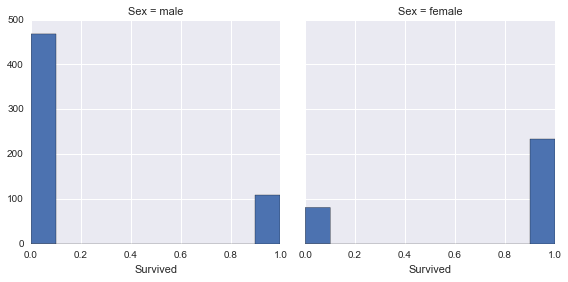

In [211]:
g=sns.FacetGrid(titanic_train,col="Sex",size=4)
g.map(plt.hist,'Survived')

In [212]:
Outcome=[]
for i in range(titanic_train.shape[0]):
    if titanic_train.loc[i]['Sex']=='female':
        Outcome.append(1)
    else:
        Outcome.append(0)

In [213]:
titanic_train['Outcome']=Outcome

In [214]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Outcome
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


#### Accuracy 

In [215]:
len(titanic_train[titanic_train['Outcome']==titanic_train['Survived']])/titanic_train.shape[0]

0.7867564534231201

* Using just the Sex feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin.

### Now using another feature Age

In [216]:
titanic_train['Age'].isnull().sum()

177

In [217]:
titanic_train['Age'].groupby(titanic_train['Sex']).median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [218]:
titanic_survived=titanic_train[(titanic_train['Survived']==1)]

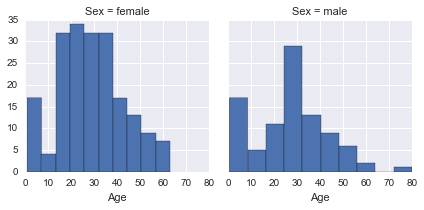

In [232]:
g=sns.FacetGrid(titanic_survived,col='Sex',palette='muted')
g.map(plt.hist,'Age')

In [220]:
titanic_not_survived=titanic_train[(titanic_train['Survived']==0)]

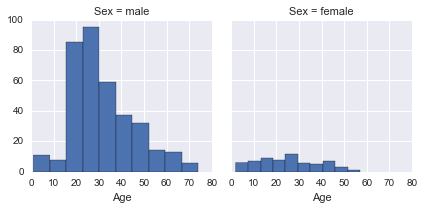

In [221]:
g=sns.FacetGrid(titanic_not_survived,col='Sex',palette='muted')
g.map(plt.hist,'Age')

##### Those who are young less than 10 survives and the old ones greater than 75 

In [275]:
Outcome=[]
for i,passenger in titanic_train.iterrows():
    if passenger['Sex']=='female':
        Outcome.append(1)
    else:
        if passenger['Age']<10 or passenger['Age']>75:
            Outcome.append(1)
        else:
            Outcome.append(0)
            
        
        

In [276]:
titanic_train['Outcome']=Outcome

#### Accuracy

In [277]:
len(titanic_train[titanic_train['Outcome']==titanic_train['Survived']])/titanic_train.shape[0]

0.7946127946127947

* Our accuracy have imroved by a small amount
* Adding the feature Age as a condition in conjunction with Sex improves the accuracy by a small margin more than with simply using the feature Sex alone

### How pclass can improve the model

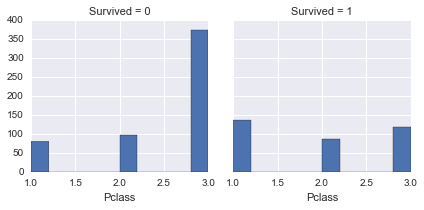

In [278]:
g=sns.FacetGrid(titanic_train,col='Survived',palette='muted')
g.map(plt.hist,'Pclass')

In [279]:
titanic_train_pclass=titanic_train[(titanic_train['Sex']=='male')]

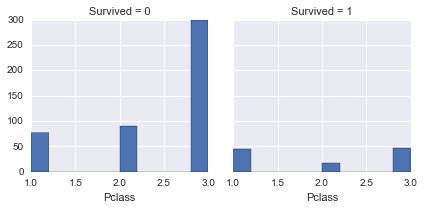

In [280]:
g=sns.FacetGrid(titanic_train_pclass,col='Survived',palette='muted')
g.map(plt.hist,'Pclass')

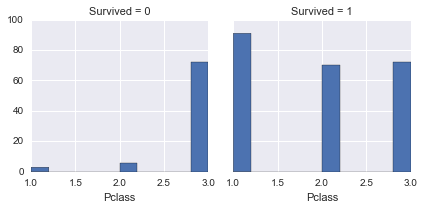

In [281]:
titanic_train_pclass=titanic_train[(titanic_train['Sex']=='female')]
g=sns.FacetGrid(titanic_train_pclass,col='Survived',palette='muted')
g.map(plt.hist,'Pclass')

- Lets try to find some pattern with Pclass==3 Sex='female' Survived=0

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


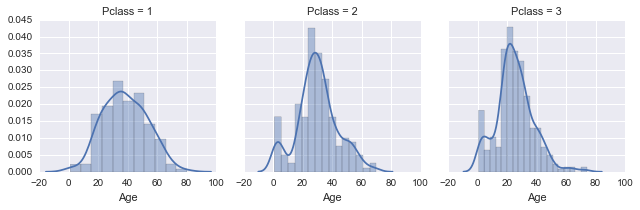

In [296]:
g=sns.FacetGrid(titanic_train,col='Pclass',palette='muted')
g.map(sns.distplot,'Age')

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


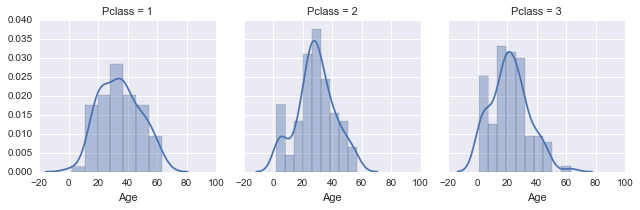

In [328]:
titanic_train_female=titanic_train[(titanic_train['Sex']=='female')]
g=sns.FacetGrid(titanic_train_female,col='Pclass',palette='muted')
g.map(sns.distplot,'Age')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


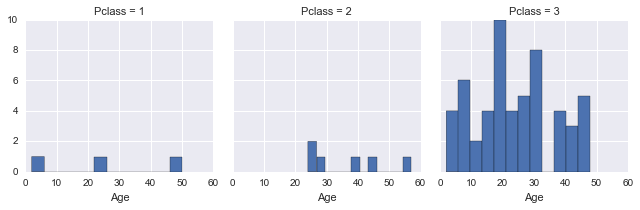

In [332]:
titanic_train_female_not_survived=titanic_train_female[(titanic_train['Survived']==0)]
g=sns.FacetGrid(titanic_train_female_not_survived,col='Pclass',palette='muted')
g.map(plt.hist,'Age',bins=12)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


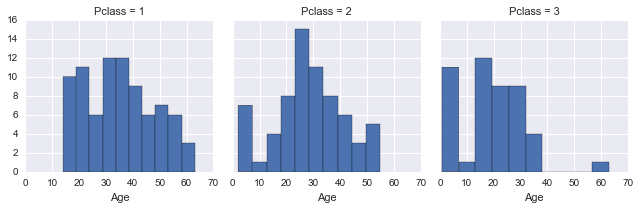

In [331]:
titanic_train_female_survived=titanic_train_female[(titanic_train['Survived']==1)]
g=sns.FacetGrid(titanic_train_female_survived,col='Pclass',palette='muted')
g.map(plt.hist,'Age')

* Those female with Pclass==3 and age less than 7 do not survive

In [359]:
Outcome=[]
for i,passengers in titanic_train.iterrows():
    if passengers['Sex']=='female':
        if (passengers['Pclass']==3) & ((passengers['Age']>40)&(passengers['Age']<50)):
            Outcome.append(0)
        else:
            Outcome.append(1)
    else:
        if passenger['Age']<10 or passenger['Age']>75:
            Outcome.append(1)
        else:
            Outcome.append(0)
        

        

In [360]:
titanic_train['Outcome']=Outcome
len(titanic_train[titanic_train['Outcome']==titanic_train['Survived']])/titanic_train.shape[0]

0.7957351290684624

* Although the model accuracy improved marginally but this seems to be creating a biasedness.
* As there isn't a pattern here , there are just less than 10 data points like that
* If we would predict the  accuracy of the test data it wouldn't be that great

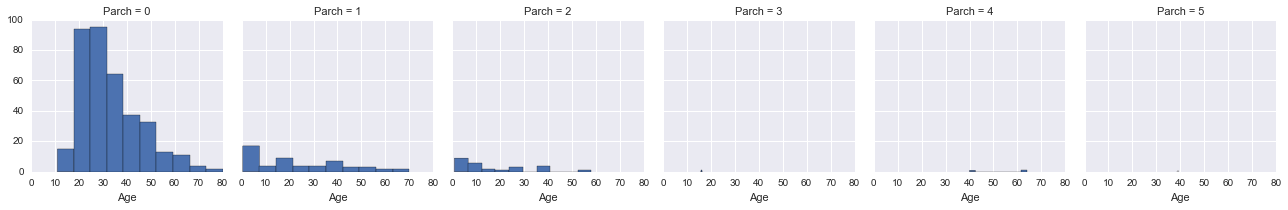

In [361]:
titanic_male=titanic_train[(titanic_train['Sex']=='male')]
g=sns.FacetGrid(titanic_train_male,col='Parch',palette='muted')
g.map(plt.hist,'Age')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


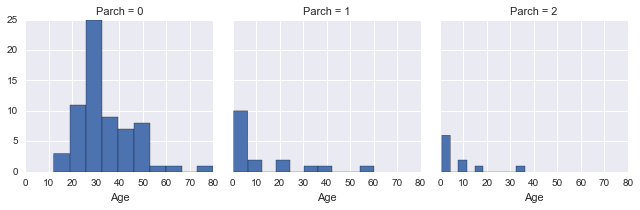

In [364]:
titanic_male_survived=titanic_male[(titanic_train['Survived']==1)]
g=sns.FacetGrid(titanic_male_survived,col='Parch',palette='muted')
g.map(plt.hist,'Age',bins=10)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


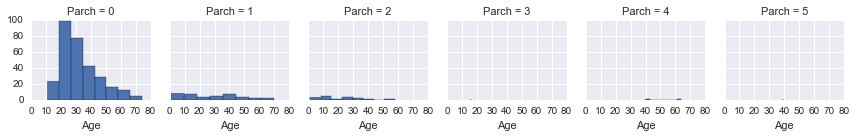

In [363]:
titanic_male_not_survived=titanic_male[(titanic_train['Survived']==0)]
g=sns.FacetGrid(titanic_male_not_survived,col='Parch',palette='muted',size=2)
g.map(plt.hist,'Age',bins=8)

* we are unable to observe any pattern here

# Conclusions

* A decision tree splits a set of data into smaller and smaller groups (called nodes), by one feature at a time. Each time a subset of the data is split, our predictions become more accurate if each of the resulting subgroups are more homogeneous (contain similar labels) than before. The advantage of having a computer do things for us is that it will be more exhaustive and more precise than our manual exploration above.

* A decision tree is just one of many models that come from supervised learning. In supervised learning, we attempt to use features of the data to predict or model things with objective outcome labels. That is to say, each of our data points has a known outcome value, such as a categorical, discrete label like 'Survived', or a numerical, continuous value like predicting the price of a house.